In [1]:
# Importa as bibliotecas necessárias para manipulação de dados, processamento de JSON e criação de gráficos.
import pandas as pd
import json
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, clear_output

# Clona o repositório do projeto Baoba do GitHub e navega até o diretório clonado.
#!git clone https://github.com/patyDSantos/baoba_project.git
#%cd /content/baoba_project

# Carrega a extensão do Colab para uma exibição dos DataFrames e habilita o formatador.
#%load_ext google.colab.data_table
#from google.colab import data_table
#data_table.enable_dataframe_formatter()

# Importa o módulo 'drive' do Google Colab, que permite interagir com o Google Drive.
#from google.colab import drive

# Monta o Google Drive no diretório '/content/drive', facilitando o acesso aos arquivos armazenados.
#drive.mount('/content/drive')

# Lê o arquivo CSV 'base.csv' do Google Drive, localizado na pasta compartilhada 'Shareddrives/arquivo_baoba'.
#df = pd.read_csv('/content/drive/Shareddrives/arquivo_baoba/abril_2025/primeiro_periodo/base.csv')
df = pd.read_csv('base.csv')

# Importa a classe MetricsProcessor do script auxiliar para análise de dados.
from baoba_processamento_dados_por_monitoramento import ProcessamentoMetricasPorMonitoramento

# Extração dos monitoramentos da coluna 'monitoramento_nome.keyword'
monitoramentos = df['monitoramento_nome.keyword'].unique().tolist()

#Instância passando os argumentos necessários
analisador = ProcessamentoMetricasPorMonitoramento(df, monitoramentos)

# Exibe um resumo do DataFrame, mostrando o número de registros, colunas, tipos de dados e uso de memória.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190089 entries, 0 to 190088
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   data                              190089 non-null  object 
 1   monitoramento_nome.keyword        190089 non-null  object 
 2   servico.keyword                   190089 non-null  object 
 3   publicador_nome.keyword           190089 non-null  object 
 4   titulo                            5326 non-null    object 
 5   conteudo.keyword                  188230 non-null  object 
 6   link.keyword                      190089 non-null  object 
 7   manifestacoes_quantidade          190089 non-null  int64  
 8   manifestacoes_detalhadas.keyword  189194 non-null  object 
 9   query                             132330 non-null  object 
 10  interacoes                        189194 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 16.

In [2]:
# Permite atualizar o nome dos monitoramentos
df['monitoramento_nome.keyword'] = df['monitoramento_nome.keyword'].replace({
    'Igualdade Racial ': 'Igualdade Racial',
    'Acessibilidade e inclusão PCD': 'Acessibilidade e Inclusão PCD',
    'Patrimônio público e probidade administr': 'Patrimônio Público e Probidade Administrativa',
    'Proteção e Inclusão Vulneraveis: ': 'Proteção e Inclusão Vulneráveis',
    'Combate à violência contra a mulher': 'Combate à Violência Contra a Mulher',
    'Desinformação em Políticas Públicas': 'Políticas Públicas'
})

In [3]:
# Calcula Interações para cada serviço utilizando o nome padrão da coluna "servico.keyword"
df_face    = analisador.calcula_interacoes(
    df, 
    'Facebook - Posts Públicos', 
    ['reactions', 'shares', 'comments'],
    service_col='servico.keyword'  # Pode ser omitido se for "servico.keyword"
)

df_x       = analisador.calcula_interacoes(
    df, 
    'X', 
    ['favorites', 'replies', 'retweets'],
    service_col='servico.keyword'
)

df_insta   = analisador.calcula_interacoes(
    df, 
    'Instagram - Posts Públicos', 
    ['likes', 'comments'],
    service_col='servico.keyword'
)

df_youtube = analisador.calcula_interacoes(
    df, 
    'YouTube - Vídeos', 
    ['likes', 'comments', 'views'],
    service_col='servico.keyword'
)

#Unifica todos os dataframes em um
df_unificado = pd.concat([df_face, df_insta, df_x, df_youtube], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190089 entries, 0 to 190088
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   data                              190089 non-null  object 
 1   monitoramento_nome.keyword        190089 non-null  object 
 2   servico.keyword                   190089 non-null  object 
 3   publicador_nome.keyword           190089 non-null  object 
 4   titulo                            5326 non-null    object 
 5   conteudo.keyword                  188230 non-null  object 
 6   link.keyword                      190089 non-null  object 
 7   manifestacoes_quantidade          190089 non-null  int64  
 8   manifestacoes_detalhadas.keyword  189194 non-null  object 
 9   query                             132330 non-null  object 
 10  interacoes                        189194 non-null  float64
dtypes: float64(1), int64(1), object(9)
memory usage: 16.

In [4]:
# Cria o dropdown usando os valores únicos da coluna
options = df_unificado["monitoramento_nome.keyword"].unique().tolist()
dropdown_monitoramento = widgets.Dropdown(
    options=options,
    description="Monitoramento"
)

# Cria um Output para exibir os resultados
out = widgets.Output()

def atualiza_display(change):
    if change["type"] == "change" and change["name"] == "value":
        with out:
            clear_output()  # Limpa o output anterior
            monitoramento_valor = change["new"]
            
            # Filtra o DataFrame com base no valor do dropdown
            df_filtrado = df_unificado[
                df_unificado["monitoramento_nome.keyword"] == monitoramento_valor
            ]
            
            # Opcional: ordena o DataFrame (ajuste a coluna de ordenação conforme necessário)
            # Por exemplo, se quiser ordenar por "interacoes":
            df_filtrado_sorted = df_filtrado.sort_values(
                by="interacoes", ascending=False
            )
            
            # Exibe as primeiras linhas do DataFrame filtrado
            display(df_filtrado_sorted.head(10))

# Liga o callback ao dropdown
dropdown_monitoramento.observe(atualiza_display, names="value")

# Exibe o widget e a área de output
display(dropdown_monitoramento)
display(out)

Dropdown(description='Monitoramento', options=('Políticas Públicas', 'Proteção e Inclusão Vulneráveis', 'Comba…

Output()

⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️

# **COLOQUE O MONITORAMENTO AQUI**

Copie cole um dos monitoramentos para gerar o gráfico:
'Acessibilidade e Inclusão PCD',
 'Adicção Digital',
 'Combate à Violência Contra a Mulher',
 'Direitos das Crianças e Adolescentes',
 'Escala 6x1',
 'Igualdade Racial',
 'Igualdade de Gênero',
 'Patrimônio Público e Probidade Administrativa',
 'Pix',
 'Políticas Públicas',
 'Proteção e Inclusão Vulneráveis',
 'Trabalhadores em Plataformas Digitais'

 Exemplo:

` monitoramento_valor =  'Igualdade Racial'`

In [5]:
#cole aqui o nome do monitoramento entre ""
monitoramento_valor =  'Igualdade Racial'

In [6]:
# Filtrar o DataFrame pelos valores especificados
df_filtrado = df_unificado.loc[
    (df_unificado['monitoramento_nome.keyword'] == monitoramento_valor)]

# Ordenar o DataFrame filtrado pela coluna 'interações' (maiores interações primeiro)
df_filtrado_sorted = df_filtrado.sort_values(by='interacoes_calculadas', ascending=False)

# Cria rótulos no formato dia-mês para exibição no eixo X
df_filtrado_sorted['data'] = pd.to_datetime(df_filtrado_sorted['data']).dt.strftime('%d-%m-%Y')

# Exibir as top n linhas até 20K
display(df_filtrado_sorted.head(2))

,data,monitoramento_nome.keyword,servico.keyword,publicador_nome.keyword,titulo,conteudo.keyword,link.keyword,manifestacoes_quantidade,manifestacoes_detalhadas.keyword,query,interacoes,reactions,shares,comments,interacoes_calculadas,likes,favorites,replies,retweets,views
57242,04-04-2025,Igualdade Racial,Instagram - Posts Públicos,ginaindelicada,NaN,O que vocês acharam disso? Uma mãe chamou aten...,https://www.instagram.com/p/DIB4eKWseO7/,109762,"{""comments"":3921,""likes"":105841}","""Programa Juventude Negra Viva"" OR ""Plano Juve...",109762.0,NaN,NaN,3921.0,109762,105841.0,NaN,NaN,NaN,NaN
52113,10-04-2025,Igualdade Racial,Instagram - Posts Públicos,palmeiras,NaN,O Palmeiras recebeu imagens que mostram um ind...,https://www.instagram.com/p/DIREPPysygD/,104525,"{""comments"":1888,""likes"":102637}","racista OR racistas OR racismo OR ""injúria rac...",104525.0,NaN,NaN,1888.0,104525,102637.0,NaN,NaN,NaN,NaN


Coloque a data no formato DD-MM e a descrição do pico entre aspas. Exemplo:



```
anotacoes = [
    {"date": "DATA AQUI", "text": "TEXTO AQUI", "xytext": (0, 30)},
    {"date": 28-03, "text": "insira o texto", "xytext": (0, 30)},
]
```




In [7]:
# Dicionário de anotações para os picos de ocorrências
anotacoes_ocorrencias = [
    {"date": "08-04", "text": " Dia da Luta pela \n Eliminação da\n Discriminação Racial", "xytext": (80, 60)},
    {"date": "10-04", "text": "Repercussão do \n jogo BRA x ARG", "xytext": (0, 30)},
]

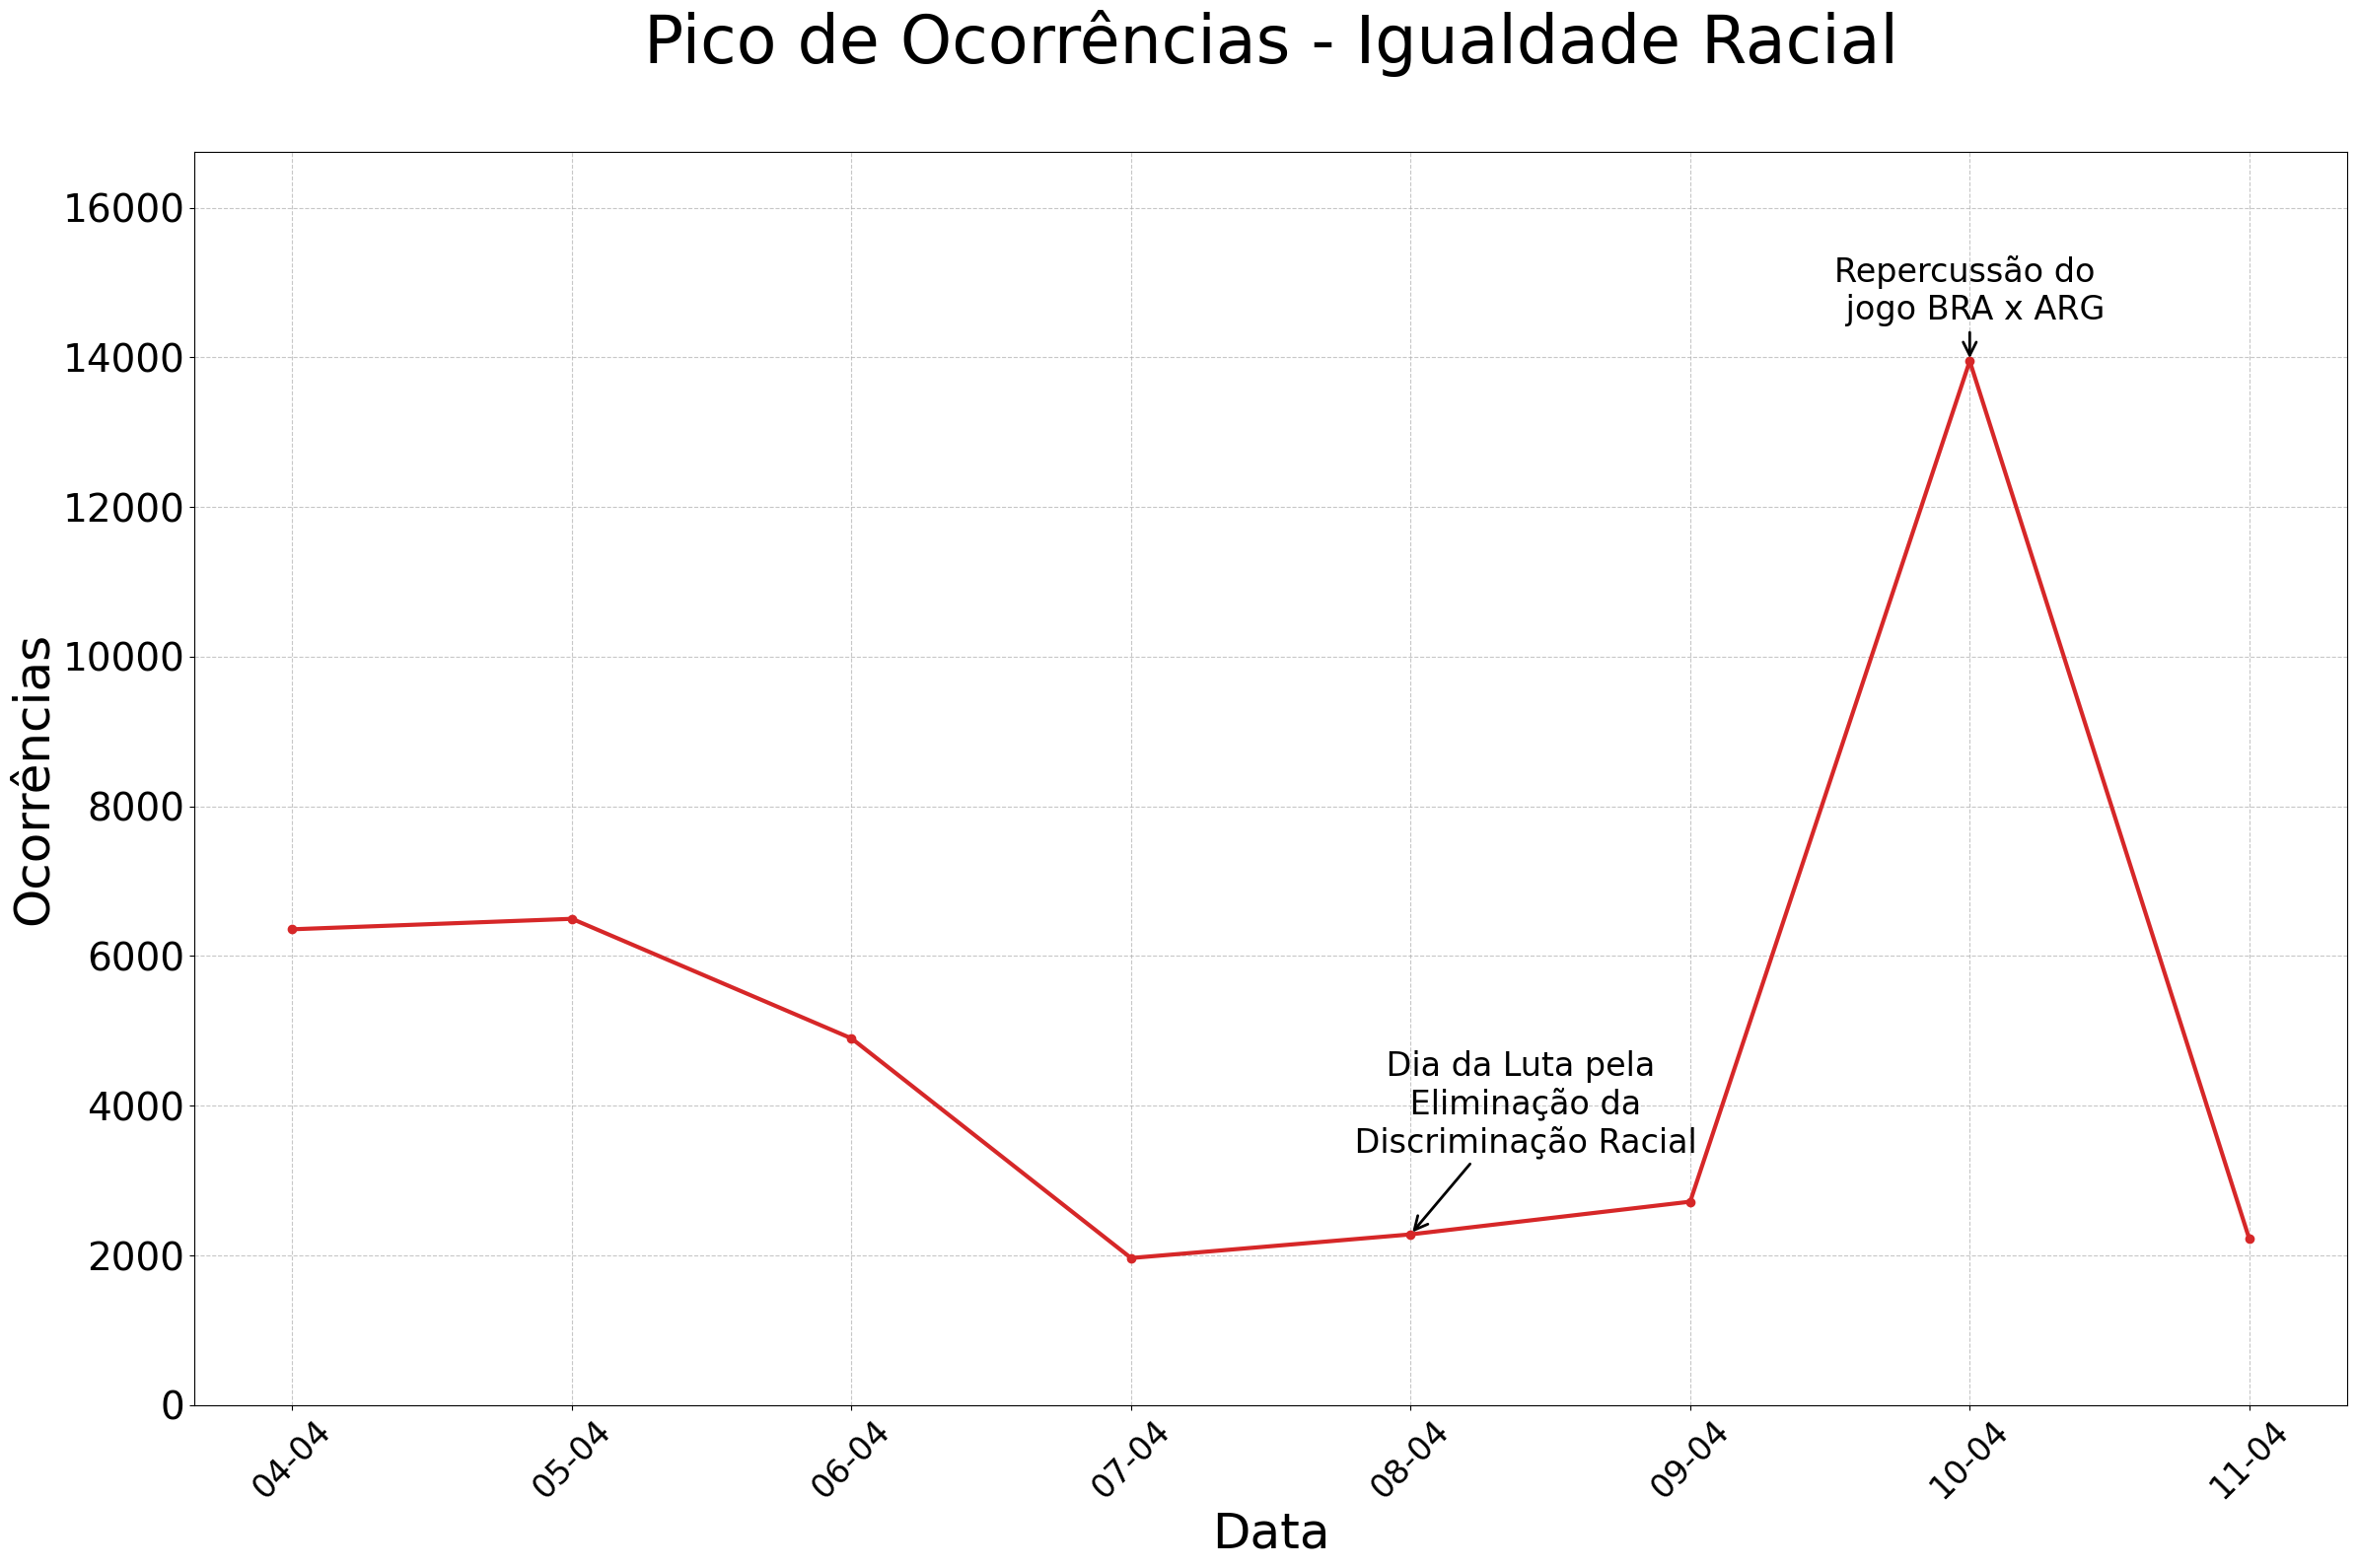

In [8]:
analisador.plota_grafico_ocorrencias_por_monitoramento(
    df,
    monitoramento=monitoramento_valor,
    annotations=anotacoes_ocorrencias,
    date_column='data',
    date_format='%d-%m',
    title='Pico de Ocorrências - ' + monitoramento_valor + '\n',
    line_color=None  # Cor personalizada para a linha
)

In [9]:
# Dicionário de anotações para os picos de interações
anotacoes_interacoes = [
    {"date": "05-04", "text": " Dia da Luta pela \n Eliminação da\n Discriminação Racial", "xytext": (80, 60)},
    {"date": "07-04", "text": "Repercussão do \n jogo BRA x ARG", "xytext": (0, 30)},
]

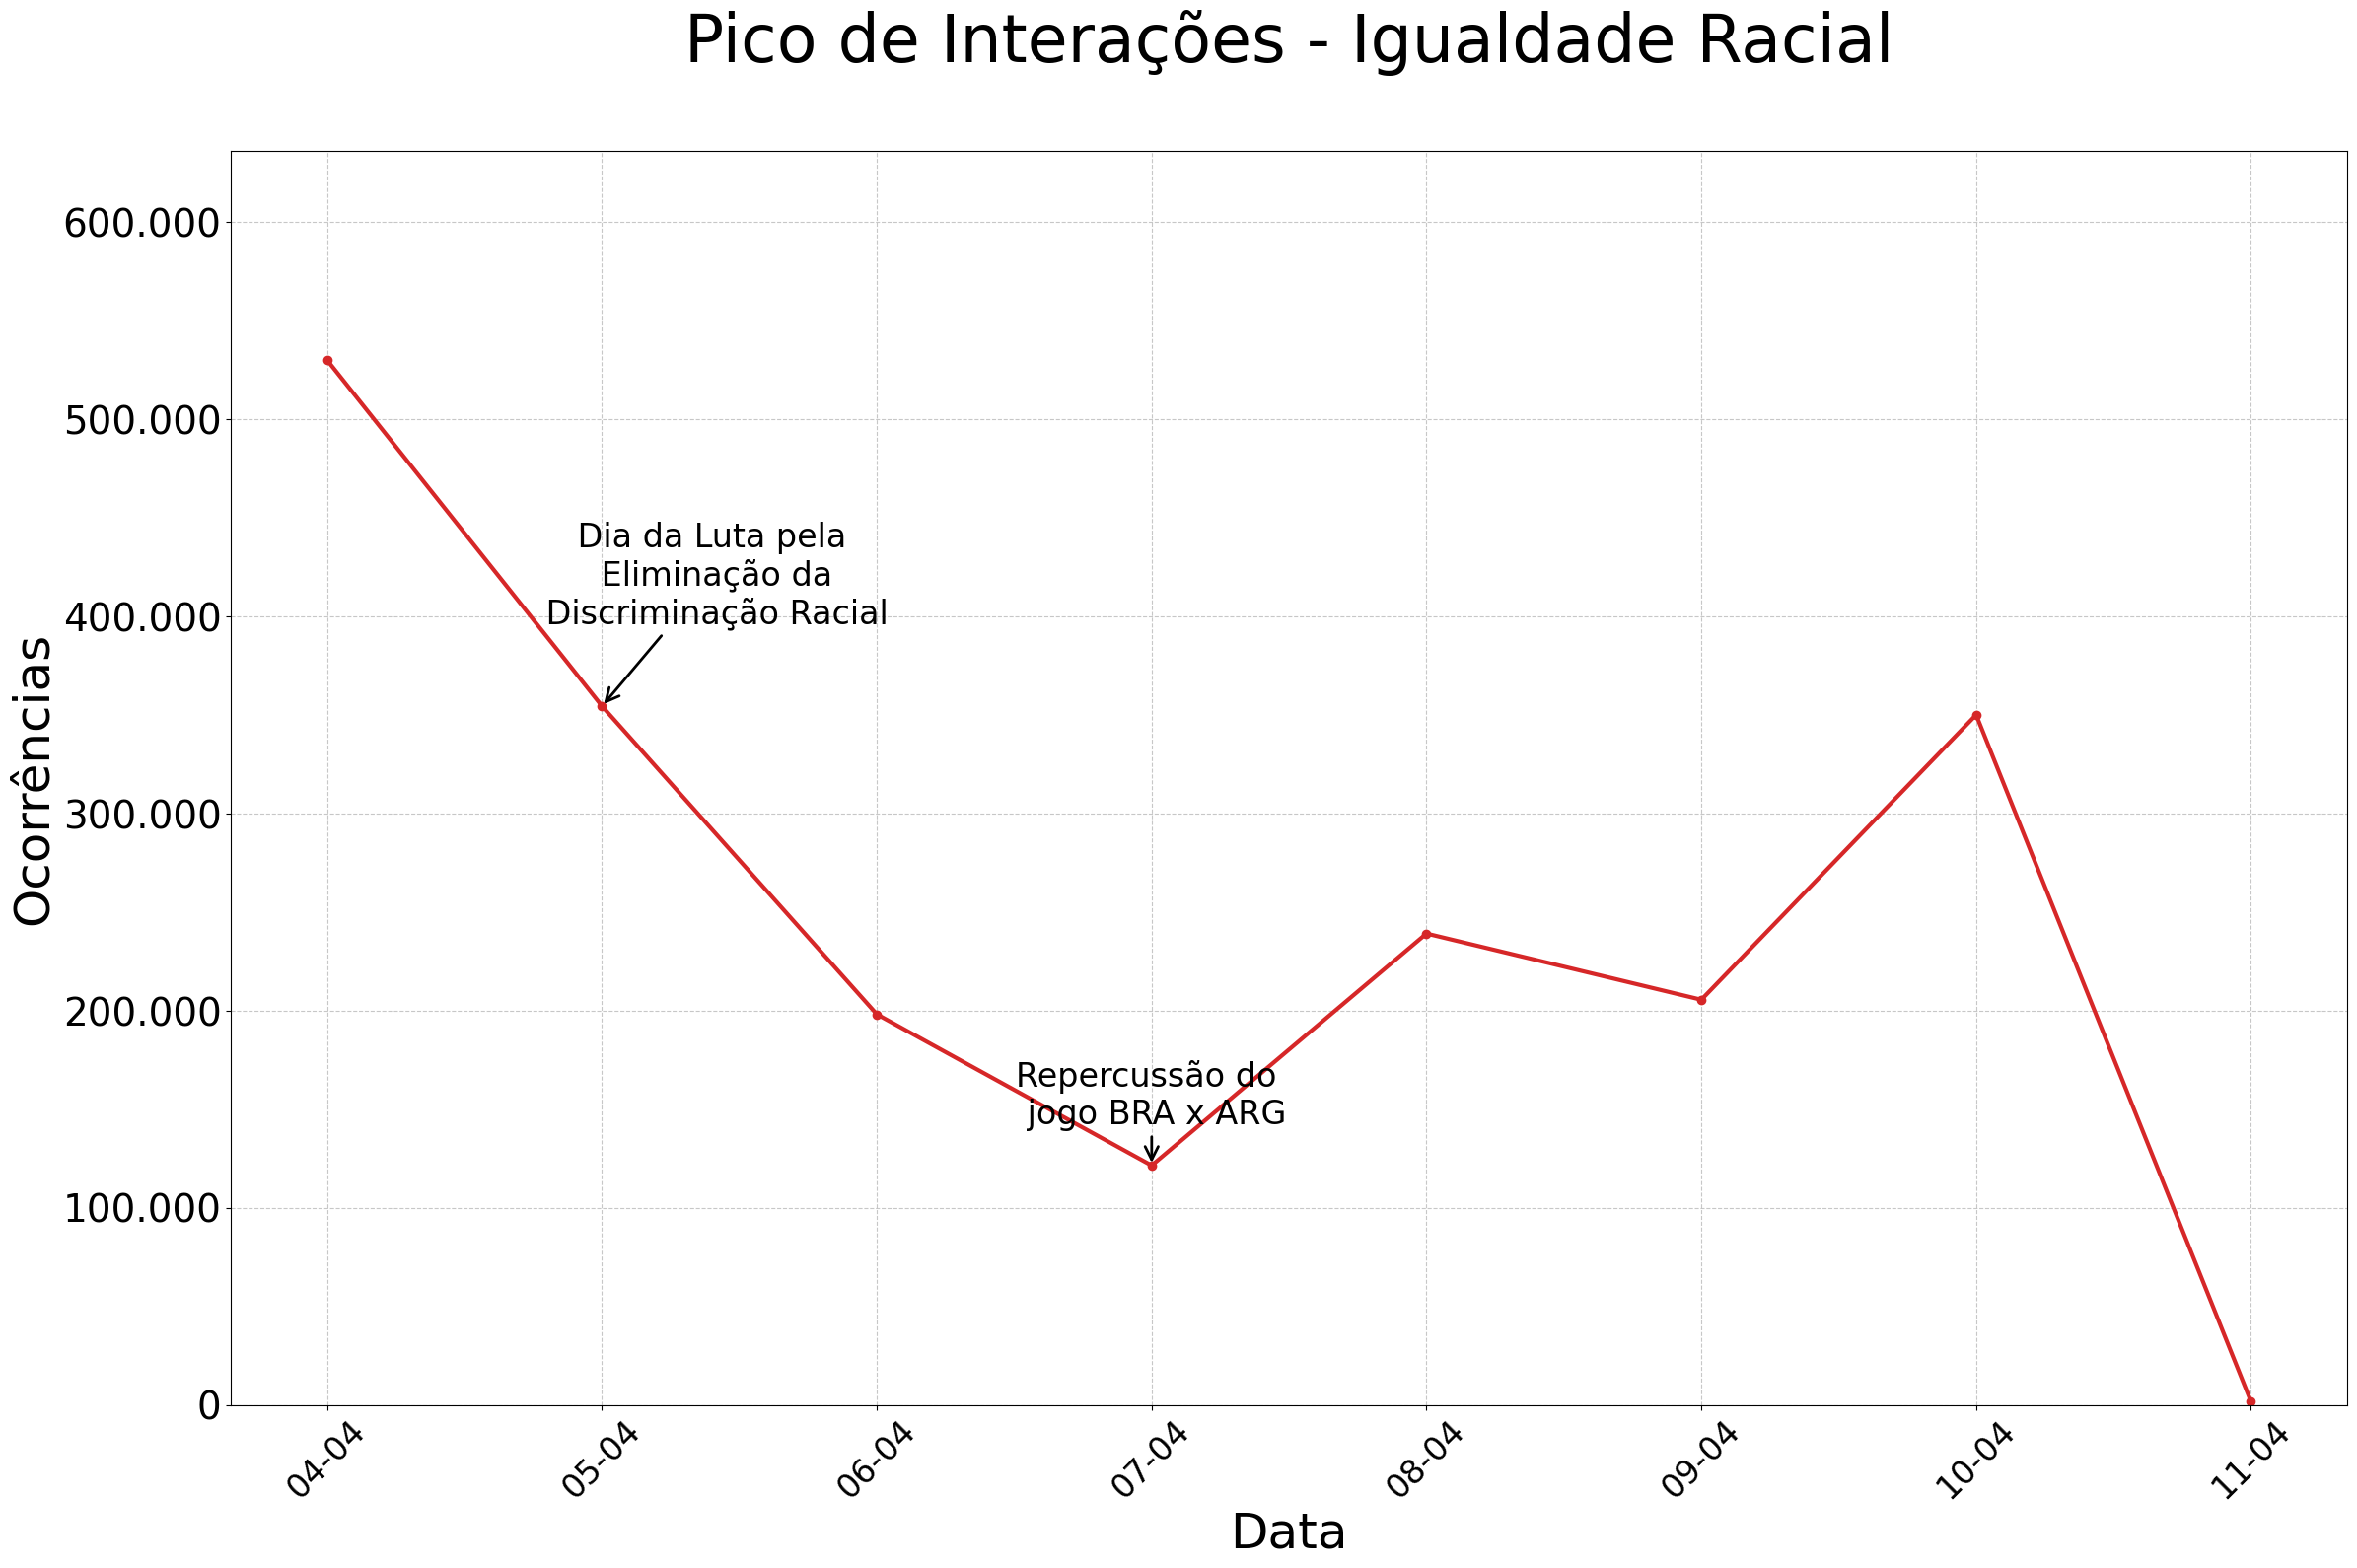

In [10]:
analisador.plota_grafico_interacoes_por_monitoramento(
    df,
    monitoramento=monitoramento_valor,
    annotations=anotacoes_interacoes,
    date_column='data',
    date_format='%d-%m',
    title='Pico de Interações - ' +  monitoramento_valor + "\n",
    line_color=None  # Cor personalizada para a linha
)

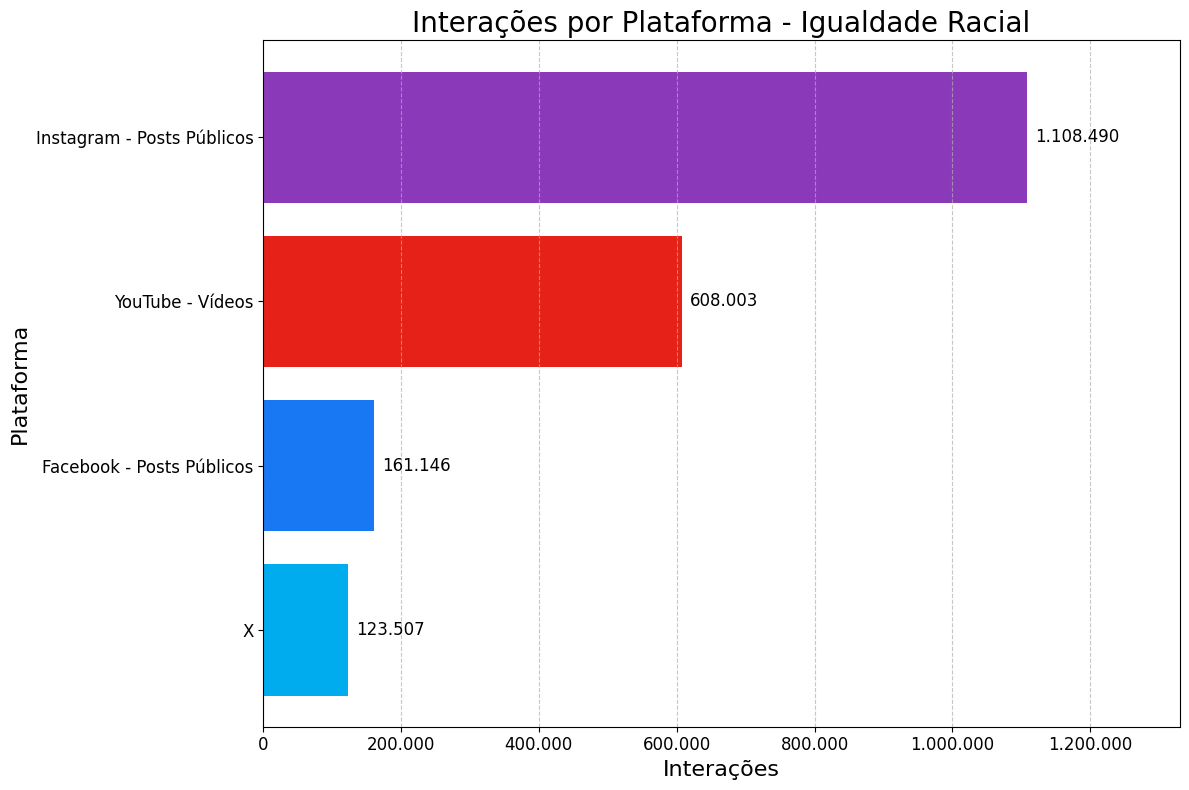

In [11]:
analisador.plota_grafico_interacoes_por_servico_por_monitoramento(
    df_unificado, 
    monitoramento_valor,
    service_column="servico.keyword",
    title="Interações por Plataforma - " + monitoramento_valor
)